**CSI 4506 Introduction à l'intelligence artificielle** <br/>
*Devoir 2: apprentissage automatique*

# Identification

Nom: Choueb Salah <br/>
Numéro d'étudiant : 8749973

Nom: Hassan Hadji-Ibrahim
Numéro d'étudiant : 300126629

# 1. Analyse exploratoire

## Exploration des données

Dans ce devoir, nous utiliserons le jeu de données de prédiction du diabète, accessible via [Diabetes Prediction Dataset](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data). Pour réduire la complexité liée à l'exigence de connexion de Kaggle, le jeu de données a été mis à disposition sur un dépôt GitHub public :

- [github.com/turcotte/csi4106-f24/tree/main/assignments-data/a2](https://github.com/turcotte/csi4106-f24/tree/main/assignments-data/a2)

Vous pouvez accéder et lire le jeu de données directement depuis ce dépôt GitHub dans votre notebook Jupyter.

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split

In [3]:
url = "https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a2/diabetes_prediction_dataset.csv"
dataset = pd.read_csv(url)
shape = dataset.shape
print(shape)



(100000, 9)


1. **Charger le jeu de données et fournir un résumé de sa structure** :

    - Décrivez les attributs (colonnes), leurs types de données et la variable cible.

In [4]:
dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
attributs_nom_types = dataset.dtypes
print(attributs_nom_types)

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


- Les données catégorielles [gender et smoking_history] sont des objects
- Les données numériques [age, bmi, HbA1c_level] sont stockées en float64 lorsque des valeurs décimales sont possibles
- int64 pour les valeurs entières [diabetes, blood_glucose_level]

La variable cible: `diabetes`.

La col diabetes est représentée par un entier indiquant si un individu est atteint de diabète [1 = oui, 0 = non].

Voici un apercu:

In [6]:
print(dataset['diabetes'].head(10))

0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    0
8    0
9    0
Name: diabetes, dtype: int64


2. **Analyse de la distribution des attributs** :

    - Examinez la distribution de chaque attribut à l'aide de visualisations appropriées telles que des histogrammes et des boxplots. Discutez des informations obtenues, y compris la présence de valeurs aberrantes.

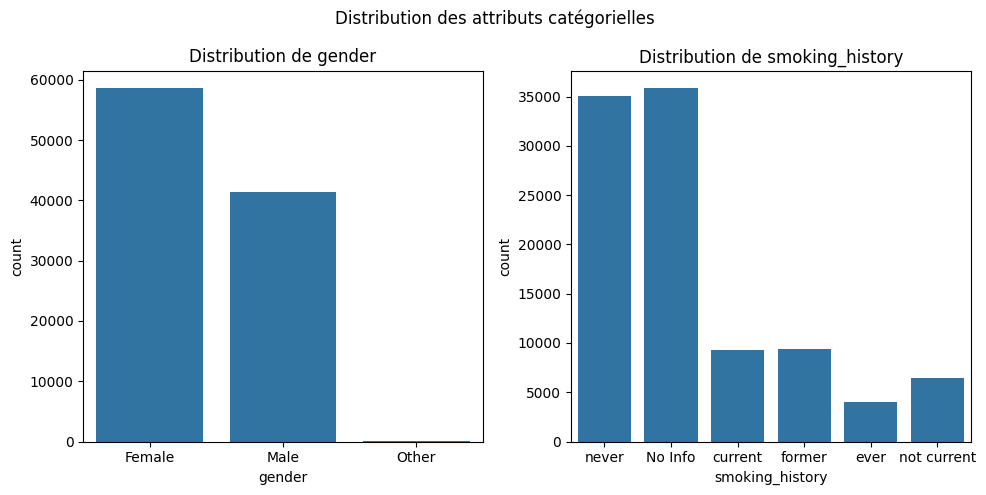

In [7]:

#Énumération des colonnes catégorielles 
categorical_columns = ['gender', 'smoking_history']

plt.figure(figsize=(10, 5))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 2, i)
    plt.suptitle('Distribution des attributs catégorielles')
    sns.countplot(data=dataset, x=column)
    plt.title(f'Distribution de {column}')
    
plt.tight_layout()
plt.show()


Nous estimons que le gendre des sujets est un facteur important, les personnes non-identifiables sont tres tres peu, et les retirer ne nous causera pas grand probleme. 'Other' est donc une valeur aberrante, tout comme ever qui est synonyme de never dans l'attribut "Smoking_history"

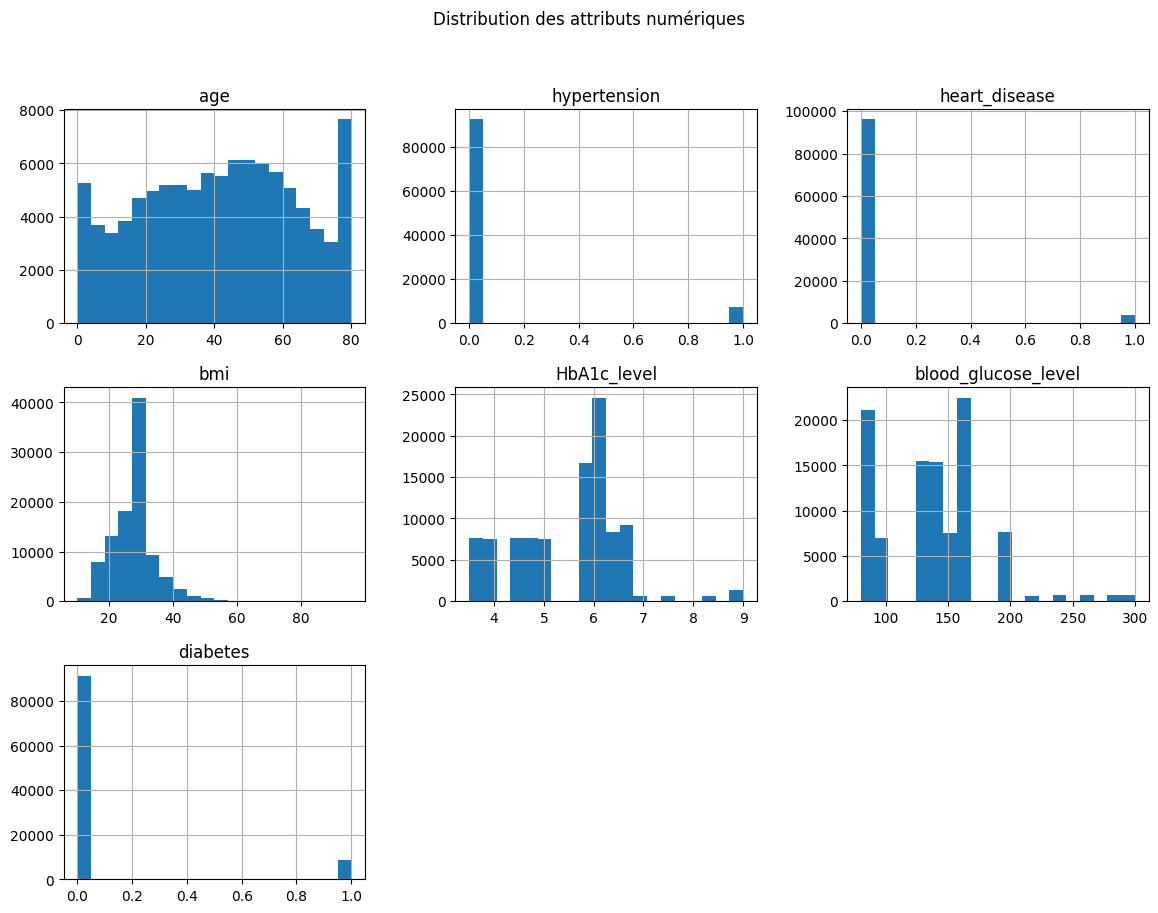

In [8]:
dataset.hist(bins=20, figsize=(14, 10))
plt.suptitle('Distribution des attributs numériques')
plt.show()

3. **Distribution de la variable cible** :

    - Analysez la distribution de la variable cible pour identifier les déséquilibres de classes. Utilisez des diagrammes en barres pour visualiser les fréquences des classes.

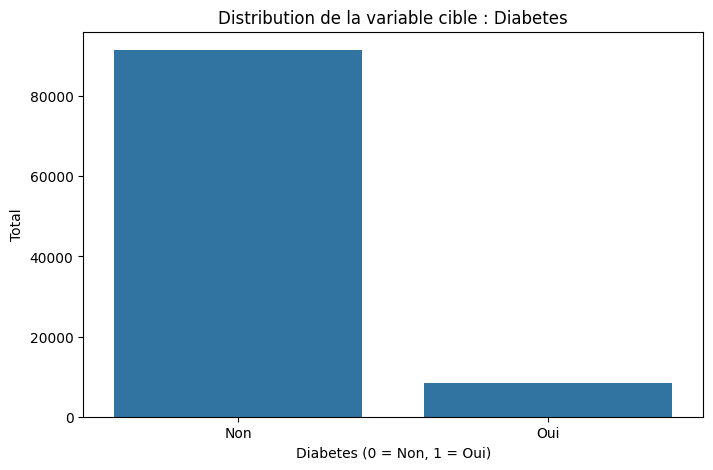

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(x='diabetes', data=dataset)
plt.title('Distribution de la variable cible : Diabetes')
plt.xlabel('Diabetes (0 = Non, 1 = Oui)')
plt.ylabel('Total')
plt.xticks(ticks=[0, 1], labels=['Non', 'Oui'])
plt.show()

**explications**

4. **Fractionnement des données** :

    - Divisez le jeu de données en ensembles d'entraînement (80 %) et de test (20 %) en utilisant la méthode du holdout.

    - Assurez-vous que ce fractionnement intervient avant tout prétraitement afin d'éviter les fuites de données.

In [10]:
X = dataset.drop(columns=['diabetes'])
y = dataset['diabetes']
##print(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Prétraitement des données

5. **Encodage des variables catégoriques** :

    - Encodez les variables catégoriques. Justifiez la méthode choisie.

explanation of encoding***

<br> <b> Tableau original: <b>

In [11]:
dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [12]:
X_train['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [13]:
X_test['smoking_history'].unique()

array(['No Info', 'former', 'never', 'not current', 'current', 'ever'],
      dtype=object)

Certaine valeur d'attribut peut engendre une mauvaise representation de la distribution orginal de notre base de donnees. En effet en utilisant la fonction d'unicite d'une vauelr, nous voulons separer nos donees en sous groupe, pour obtenir un training set plus effective, propre et representative de notre valeur. Cette methode deviendra plus utile quand la distrubution de certaines attribut reste desequilibré.


In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
encoded = OneHotEncoder(handle_unknown = 'ignore' , sparse_output = False).set_output(transform = 'pandas')

encoded_transform_gender_test = encoded.fit_transform(X_test[['gender']])
encoded_transform_gender_train = encoded.fit_transform(X_train[['gender']])
encoded_transform_smoking_test = encoded.fit_transform(X_test[['smoking_history']])
encoded_transform_smoking_train = encoded.fit_transform(X_train[['smoking_history']])

Nous avons aussi besoin de transformer les valeurs categoriques en numeriques (ainsi obtenir des valeurs binaire), ceci creee des attributs en plus tout en utilisant les valeurs de attributs precedant respective  et  permet  une meilleure precision de nos futures coefficients

<br> <b> L'encodage de la colonne `gender` <b>

In [16]:
encoded_transform_gender_train

,gender_Female,gender_Male,gender_Other
75220,0.0,1.0,0.0
48955,0.0,1.0,0.0
44966,1.0,0.0,0.0
13568,1.0,0.0,0.0
92727,1.0,0.0,0.0
...,...,...,...
6265,0.0,1.0,0.0
54886,1.0,0.0,0.0
76820,0.0,1.0,0.0
860,1.0,0.0,0.0


In [17]:
encoded_transform_gender_test

,gender_Female,gender_Male,gender_Other
75721,1.0,0.0,0.0
80184,1.0,0.0,0.0
19864,0.0,1.0,0.0
76699,1.0,0.0,0.0
92991,1.0,0.0,0.0
...,...,...,...
32595,1.0,0.0,0.0
29313,0.0,1.0,0.0
37862,1.0,0.0,0.0
53421,0.0,1.0,0.0


<br> <b> L'encodage de la colonne `smoking_history` <b>

In [18]:
encoded_transform_smoking_train

,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
75220,0.0,0.0,0.0,1.0,0.0,0.0
48955,0.0,0.0,0.0,0.0,1.0,0.0
44966,0.0,0.0,1.0,0.0,0.0,0.0
13568,0.0,0.0,0.0,0.0,0.0,1.0
92727,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
6265,0.0,0.0,0.0,0.0,1.0,0.0
54886,0.0,0.0,0.0,0.0,1.0,0.0
76820,0.0,0.0,0.0,0.0,1.0,0.0
860,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
encoded_transform_smoking_test

,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
75721,1.0,0.0,0.0,0.0,0.0,0.0
80184,1.0,0.0,0.0,0.0,0.0,0.0
19864,0.0,0.0,0.0,1.0,0.0,0.0
76699,0.0,0.0,0.0,0.0,1.0,0.0
92991,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
32595,0.0,0.0,0.0,0.0,0.0,1.0
29313,0.0,0.0,0.0,1.0,0.0,0.0
37862,0.0,0.0,0.0,0.0,1.0,0.0
53421,1.0,0.0,0.0,0.0,0.0,0.0


In [20]:
X_train = pd.concat([X_train,encoded_transform_gender_train], axis= 1)
X_test = pd.concat([X_test,encoded_transform_gender_test], axis= 1)

X_train = pd.concat([X_train,encoded_transform_smoking_train], axis= 1)
X_test = pd.concat([X_test,encoded_transform_smoking_test], axis= 1)

##dataset = pd.concat([dataset,encoded_transform_smoking], axis= 1)

<br> <b> Les colonnes encodées concaténées au jeu de données d'origine: <b>

In [21]:
X_train.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
75220,Male,73.0,0,0,former,24.77,3.5,80,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48955,Male,80.0,0,0,never,24.60,5.7,145,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
44966,Female,38.0,0,0,ever,24.33,4.0,158,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13568,Female,26.0,0,0,not current,18.87,5.0,100,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
92727,Female,61.0,1,0,current,22.11,4.5,85,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [22]:
X_test.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
75721,Female,13.0,0,0,No Info,20.82,5.8,126,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
80184,Female,3.0,0,0,No Info,21.00,5.0,145,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
19864,Male,63.0,0,0,former,25.32,3.5,200,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
76699,Female,2.0,0,0,never,17.43,6.1,126,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
92991,Female,33.0,0,0,not current,40.08,6.2,200,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<br> <b> Jeu de données mis à jour en supprimant les colonnes `gender` et `smoking_history` <b>

In [23]:
X_train = X_train.drop(columns = 'gender')
X_train =X_train.drop(columns = 'smoking_history')

X_test = X_test.drop(columns = 'gender')
X_test =X_test.drop(columns = 'smoking_history')

X_train.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
75220,73.0,0,0,24.77,3.5,80,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48955,80.0,0,0,24.60,5.7,145,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
44966,38.0,0,0,24.33,4.0,158,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13568,26.0,0,0,18.87,5.0,100,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
92727,61.0,1,0,22.11,4.5,85,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [24]:
X_test.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
75721,13.0,0,0,20.82,5.8,126,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
80184,3.0,0,0,21.00,5.0,145,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
19864,63.0,0,0,25.32,3.5,200,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
76699,2.0,0,0,17.43,6.1,126,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
92991,33.0,0,0,40.08,6.2,200,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


6. **Normalisation/Standardisation des attributs numériques** :

    - Normalisez ou standardisez les attributs numériques si nécessaire. Décrivez la technique utilisée (par exemple, le scaling Min-Max, StandardScaler) et expliquez pourquoi elle est appropriée pour ce jeu de données.

    - Assurez-vous que cette technique est appliquée uniquement aux données d'entraînement, avec la même transformation appliquée ensuite aux données de test sans nouvel ajustement.

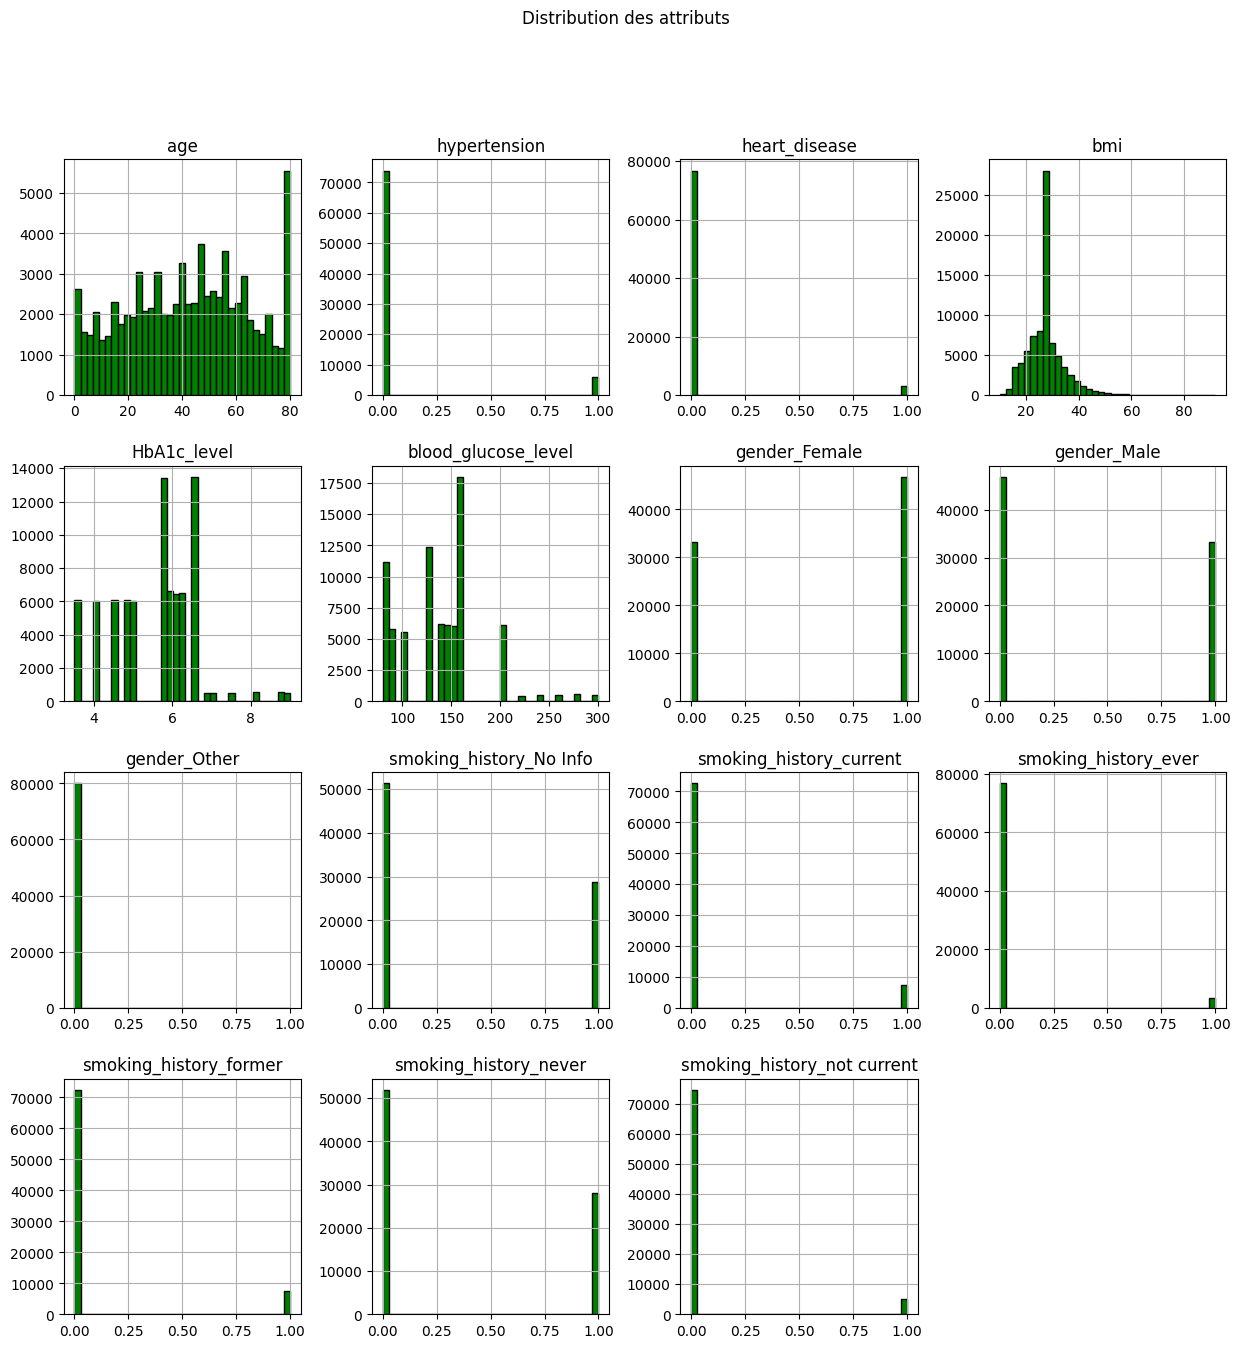

In [25]:
col = X_train.columns
X_train[col].hist(figsize=(15,15),bins = 35, color = 'green', edgecolor = 'black')
plt.suptitle('Distribution des attributs')
plt.xlabel('Valeurs')
plt.ylabel('Total')
plt.title('Distributions')
plt.show()

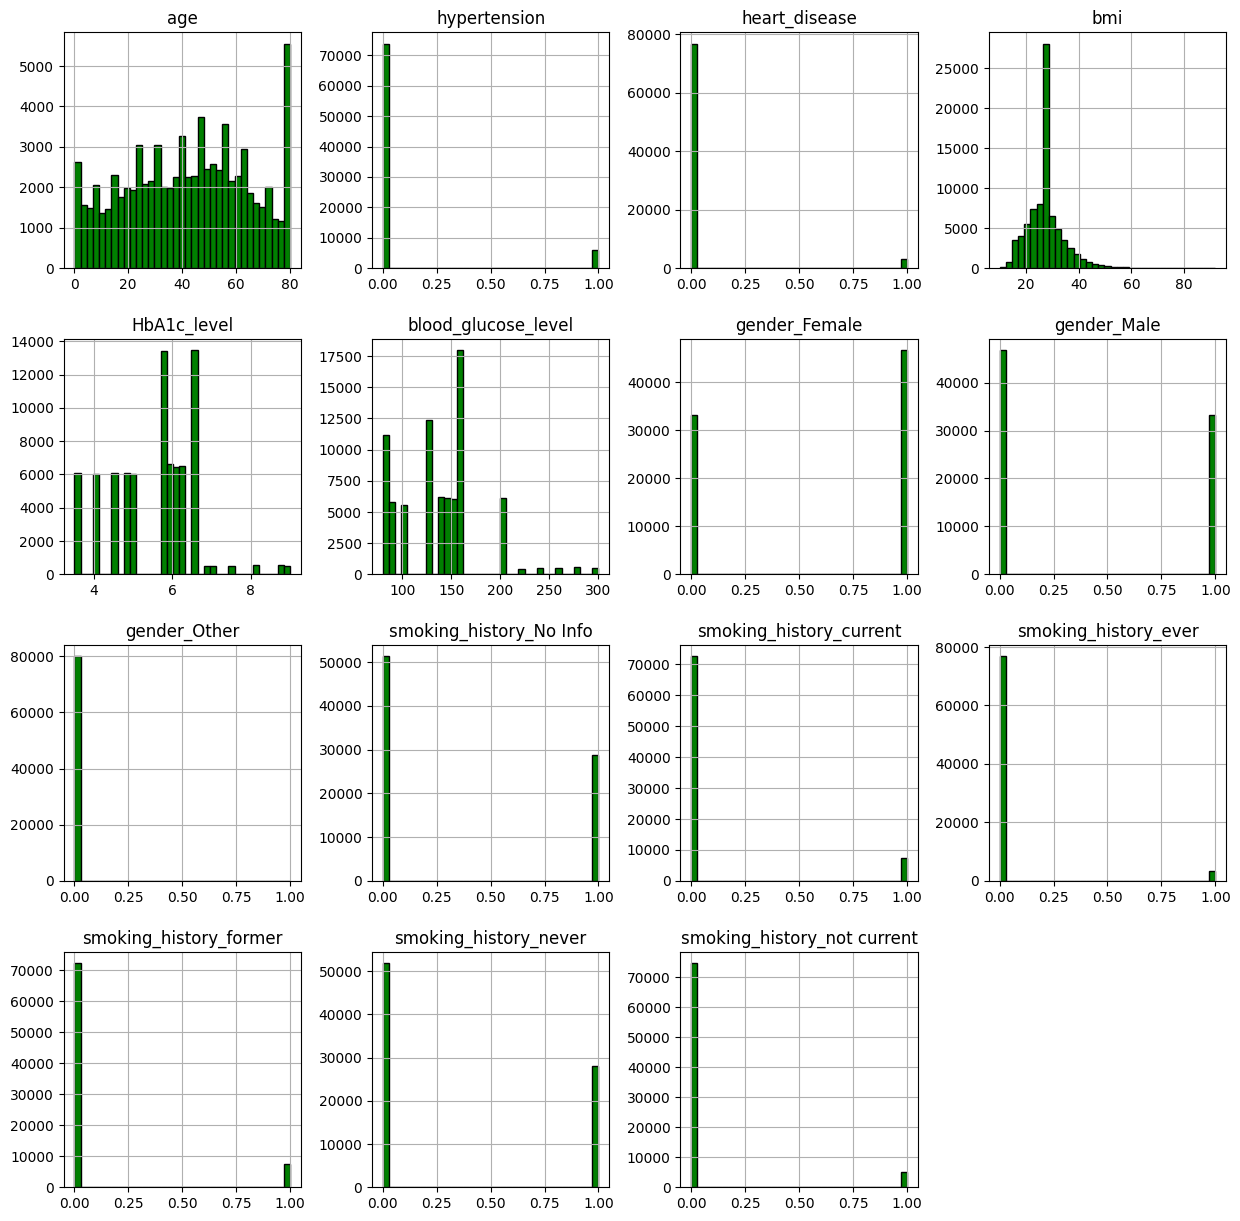

In [26]:
col = X_test.columns
X_train[col].hist(figsize=(15,15),bins = 35, color = 'green', edgecolor = 'black')
plt.xlabel('Valeurs')
plt.ylabel('Total')
plt.title('Distributions')
plt.show()

In [27]:
columns_norm = ['HbA1c_level', 'blood_glucose_level', 'bmi']
X_train[columns_norm] = np.log(X_train[columns_norm] + 1)

Nous avons contaster que certaine attribut comme le HbA1c_level, blood_glucose_level, bmi, ont une distrubution des valeurs . Plusieurs meme valeurs se repetent, nous avons donc decidé d'utiliser une normalisaton longarithmique. Ceci permet donc de réduire l'asymétrie des variables qui contiennent quelques valeurs très élevées, rapprochant ainsi leur distribution d'une distribution normale (gaussienne), et ecartant les valeurs proches du zero (meilleur impact)

In [28]:
X_test.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
75721,13.0,0,0,20.82,5.8,126,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
80184,3.0,0,0,21.00,5.0,145,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
19864,63.0,0,0,25.32,3.5,200,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
76699,2.0,0,0,17.43,6.1,126,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
92991,33.0,0,0,40.08,6.2,200,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [29]:
X_test[columns_norm] = np.log(X_test[columns_norm] + 1)

In [30]:
X_test.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
75721,13.0,0,0,3.082827,1.916923,4.844187,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
80184,3.0,0,0,3.091042,1.791759,4.983607,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
19864,63.0,0,0,3.270329,1.504077,5.303305,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
76699,2.0,0,0,2.913980,1.960095,4.844187,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
92991,33.0,0,0,3.715521,1.974081,5.303305,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


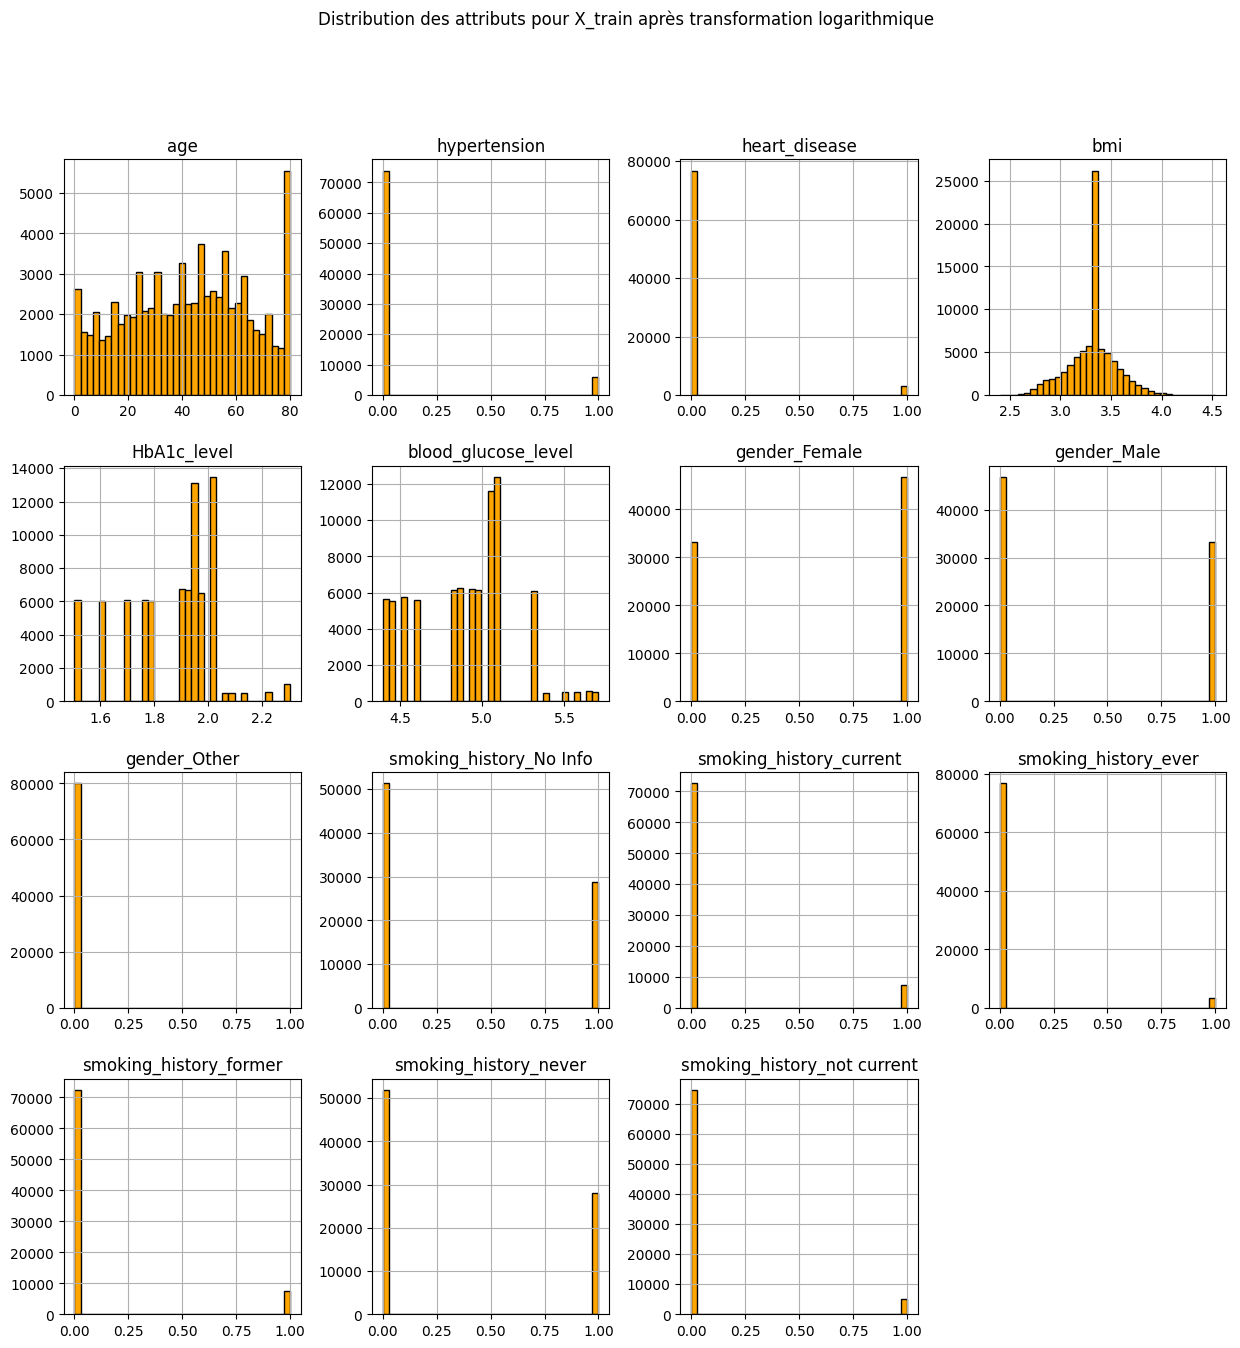

In [31]:
col = X_train.columns
X_train[col].hist(figsize=(15,15),bins = 35, color = 'orange', edgecolor = 'black')
plt.suptitle('Distribution des attributs pour X_train après transformation logarithmique')
plt.xlabel('Valeurs')
plt.ylabel('Total')
plt.title('Distributions')
plt.show()

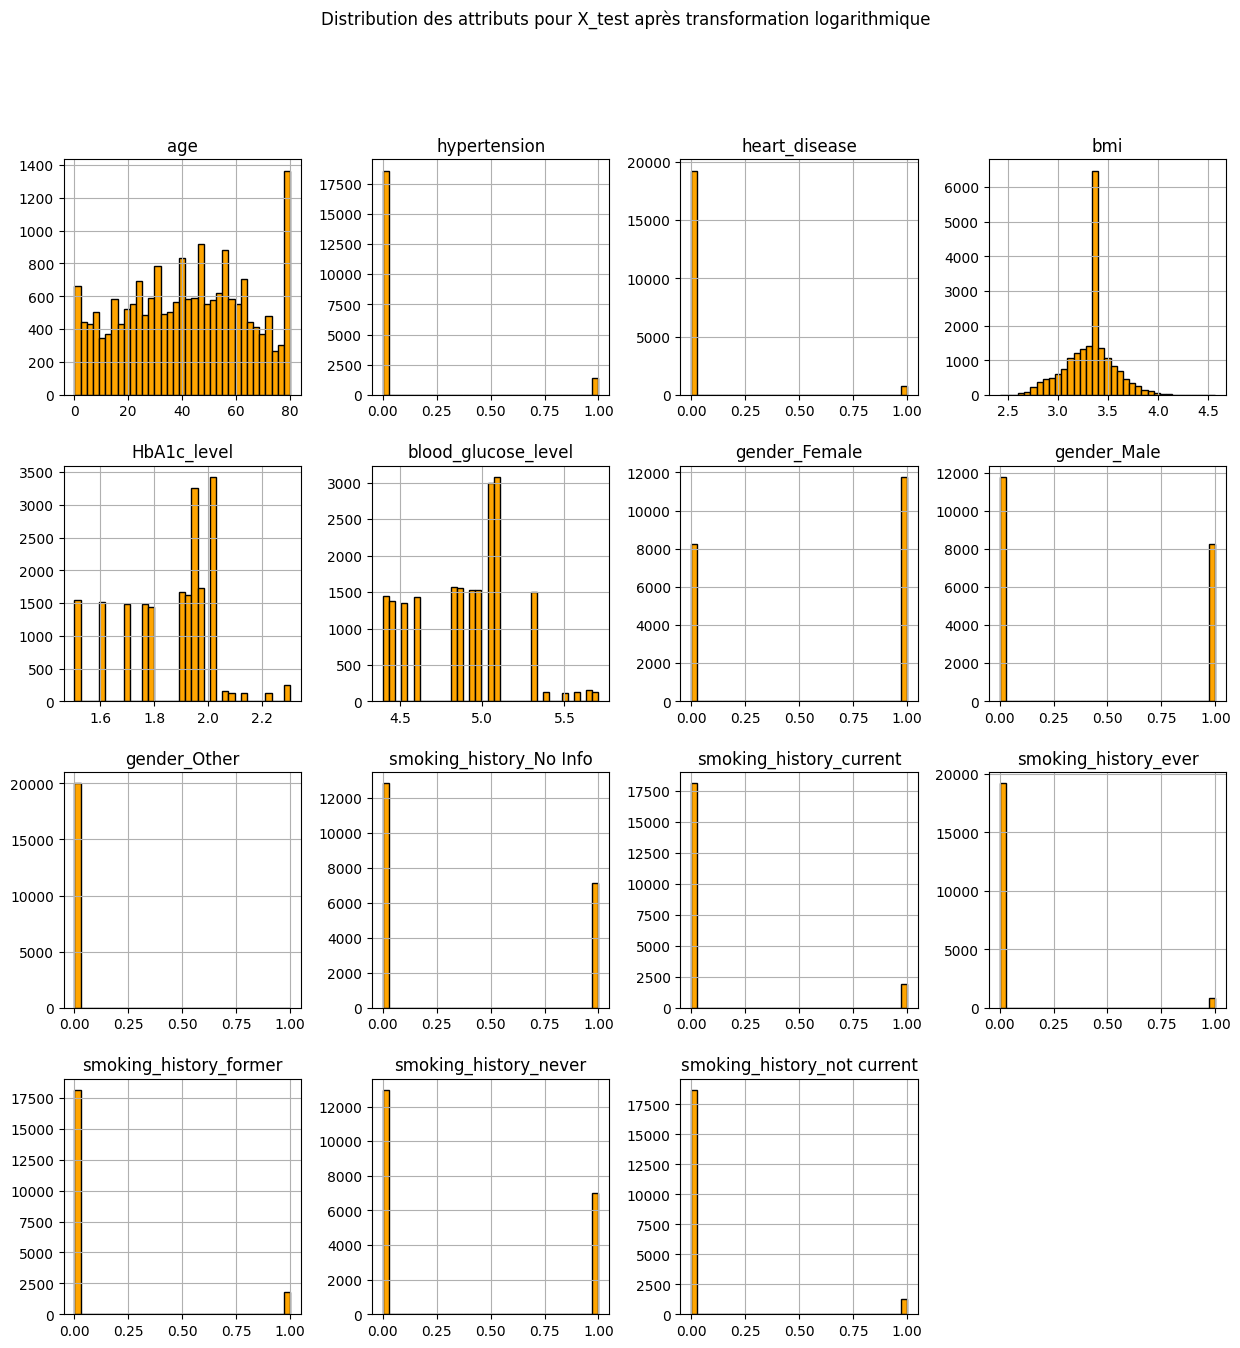

In [32]:
coll = X_test.columns
X_test[coll].hist(figsize=(15,15),bins = 35, color = 'orange', edgecolor = 'black')
plt.suptitle('Distribution des attributs pour X_test après transformation logarithmique')
plt.xlabel('Valeurs')
plt.ylabel('Total')
plt.title('Distributions')
plt.show()

In [33]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

columns_stand = ['HbA1c_level', 'blood_glucose_level']

print(X_test[columns_stand].isnull().sum())

X_train[columns_stand] = robust_scaler.fit_transform(X_train[columns_stand])



HbA1c_level            0
blood_glucose_level    0
dtype: int64


In [34]:
X_test[columns_stand] = robust_scaler.transform(X_test[columns_stand])

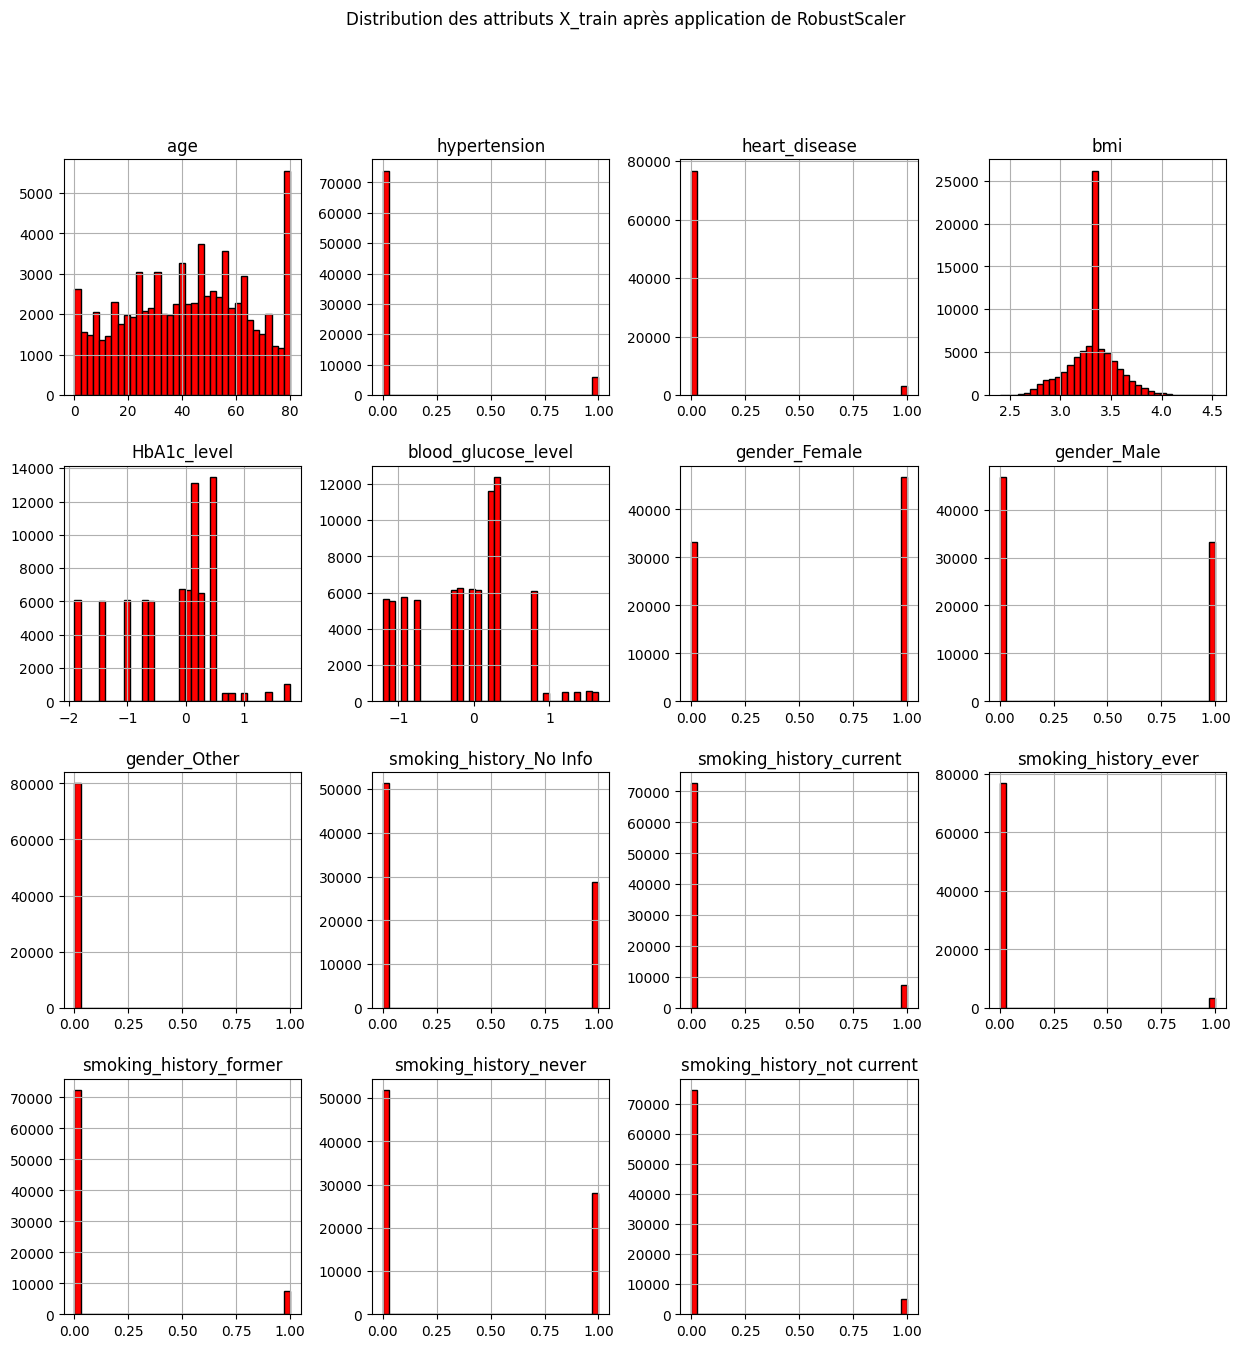

In [35]:
col = X_train.columns
X_train[col].hist(figsize=(15,15),bins = 35, color = 'red', edgecolor = 'black')
plt.suptitle('Distribution des attributs X_train après application de RobustScaler')
plt.xlabel('Valeurs')
plt.ylabel('Total')
plt.title('Distributions')
plt.show()

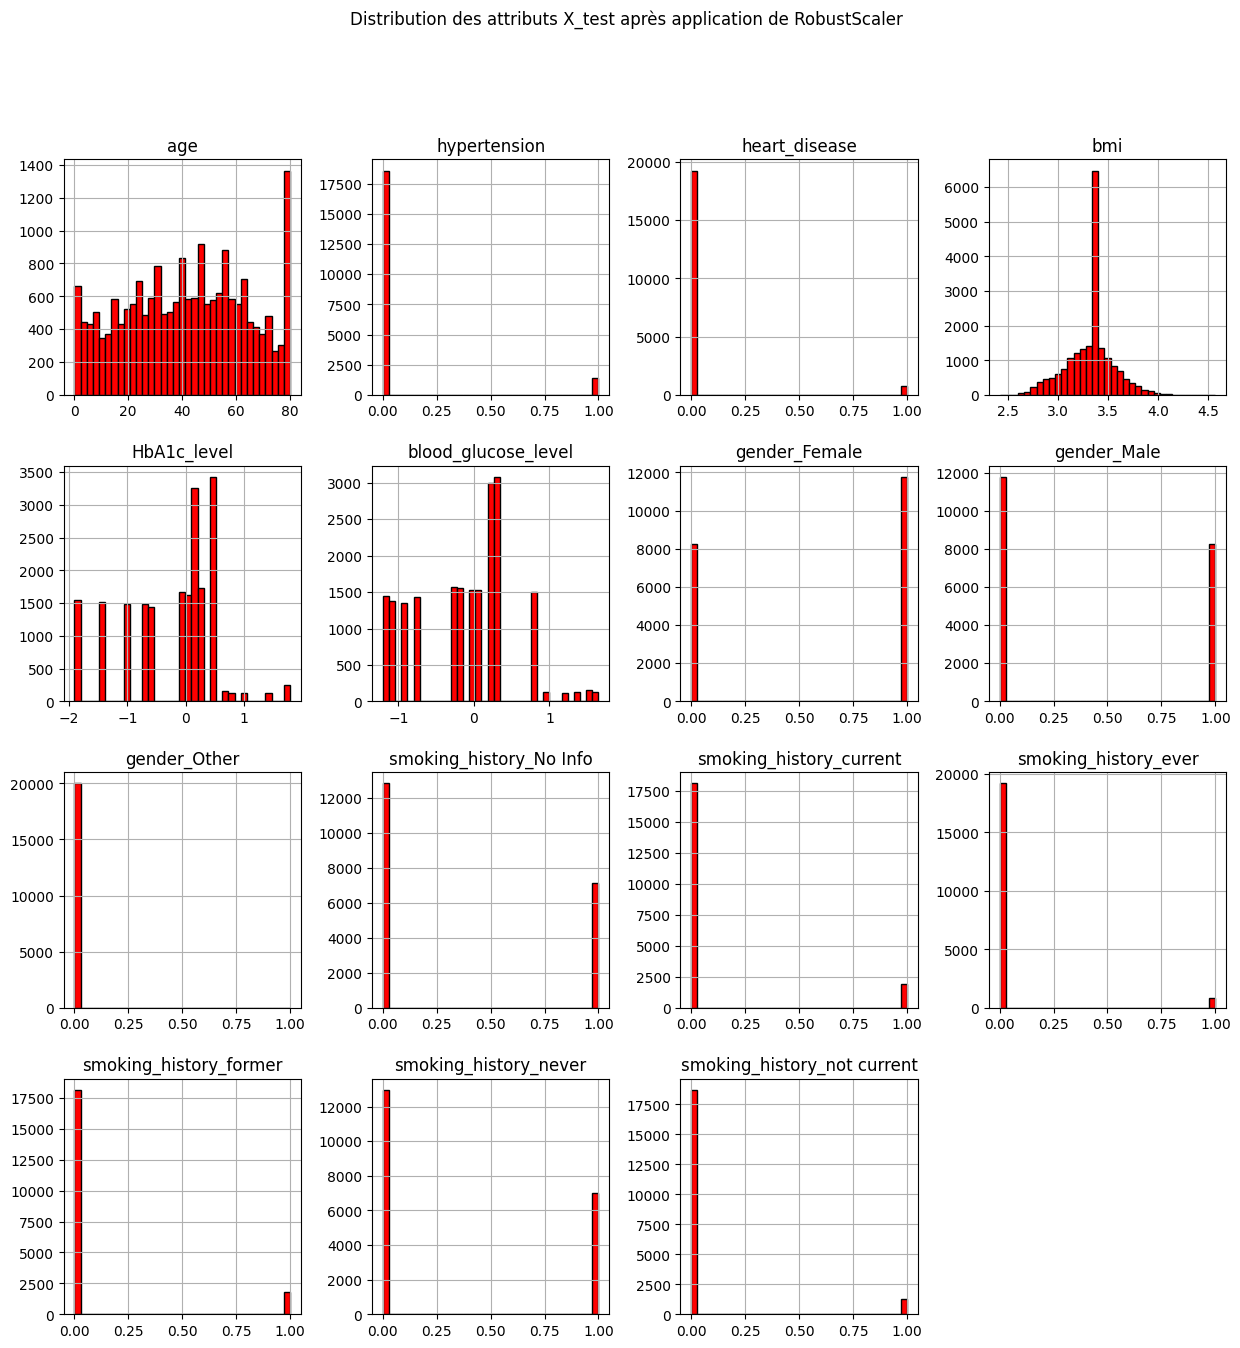

In [36]:
col = X_test.columns
X_test[col].hist(figsize=(15,15),bins = 35, color = 'red', edgecolor = 'black')
plt.suptitle('Distribution des attributs X_test après application de RobustScaler')
plt.xlabel('Valeurs')
plt.ylabel('Total')
plt.title('Distributions')
plt.show()

## Développement et évaluation des modèles

7. **Développement des modèles** :

    - Implémentez les modèles d'apprentissage automatique abordés en classe : arbres de décision, K-Nearest Neighbors (KNN) et régression logistique. Utilisez les paramètres par défaut de scikit-learn comme base pour entraîner chaque modèle.

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

logistic_regression = LogisticRegression(max_iter=10000)

logistic_regression.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [38]:
from sklearn.metrics import classification_report

print("KNN Classification Report:\n", classification_report(y_test, knn.predict(X_test)))
print("Decision Tree Classification Report:\n", classification_report(y_test, decision_tree.predict(X_test)))
print("Logistic Regression Classification Report:\n", classification_report(y_test, logistic_regression.predict(X_test)))

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     18292
           1       0.87      0.46      0.60      1708

    accuracy                           0.95     20000
   macro avg       0.91      0.72      0.79     20000
weighted avg       0.94      0.95      0.94     20000

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     18292
           1       0.72      0.73      0.73      1708

    accuracy                           0.95     20000
   macro avg       0.85      0.85      0.85     20000
weighted avg       0.95      0.95      0.95     20000

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.86      0.61      0.71      1708

    accuracy                           0.96     20000
   macro avg      

8. **Évaluation des modèles** :

    - Utilisez la validation croisée pour évaluer chaque modèle, en justifiant votre choix du nombre de plis.

    - Évaluez les modèles à l'aide de métriques telles que la précision, le rappel et le score F1.

In [39]:
# Cellule de code
from sklearn.model_selection import cross_val_predict   

decision_tree = DecisionTreeClassifier()

decision_tree_pred = cross_val_predict(decision_tree, X_train, y_train, cv=10)



In [40]:


knn = KNeighborsClassifier()


kneighbors_pred = cross_val_predict(knn, X_train, y_train, cv=10)

In [41]:
logistic_regression = LogisticRegression(max_iter=10000)

logistic_regression_pred = cross_val_predict(logistic_regression, X_train, y_train, cv=10)

In [42]:
from sklearn.metrics import classification_report

print("KNN Classification Report:\n", classification_report(y_train, kneighbors_pred))
print("Decision Tree Classification Report:\n", classification_report(y_train, decision_tree_pred))
print("Logistic Regression Classification Report:\n", classification_report(y_train, logistic_regression_pred ))

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     73208
           1       0.87      0.46      0.60      6792

    accuracy                           0.95     80000
   macro avg       0.91      0.73      0.79     80000
weighted avg       0.94      0.95      0.94     80000

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     73208
           1       0.70      0.74      0.72      6792

    accuracy                           0.95     80000
   macro avg       0.84      0.85      0.85     80000
weighted avg       0.95      0.95      0.95     80000

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     73208
           1       0.85      0.62      0.72      6792

    accuracy                           0.96     80000
   macro avg      

## Optimisation des hyperparamètres

9. **Exploration et évaluation des performances :**

    - Étudiez l'impact de la variation des valeurs des hyperparamètres sur les performances de chaque modèle.

    - Concentrez-vous sur les hyperparamètres pertinents suivants pour chaque modèle :

        - [DecisionTreeClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html) : `criterion` et `max_depth`.
  
        - [LogisticRegression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html) : `penalty`, `max_iter`, et `tol`.
  
        - [KNeighborsClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) : `n_neighbors` et `weights`.

    - Employez une stratégie de recherche en grille ou utilisez les méthodes intégrées de scikit-learn pour évaluer exhaustivement toutes les combinaisons des valeurs d'hyperparamètres. La validation croisée doit être utilisée pour évaluer chaque combinaison.

    - Quantifiez les performances de chaque configuration d'hyperparamètres en utilisant des métriques telles que la précision, le rappel et le score F1.

    - Affichez les résultats dans un format tabulaire ou graphique (par exemple, graphiques en ligne, diagrammes en barres) pour démontrer efficacement l'influence des variations des hyperparamètres sur les performances du modèle.

    - Spécifiez les valeurs par défaut de chaque hyperparamètre testé.

    - Analysez les résultats et offrez des perspectives sur les configurations d'hyperparamètres ayant obtenu les meilleures performances pour chaque modèle.

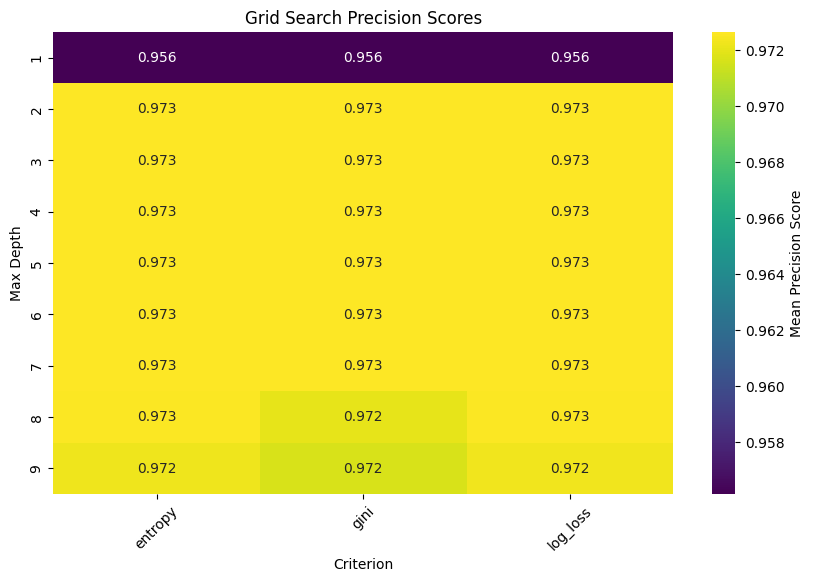

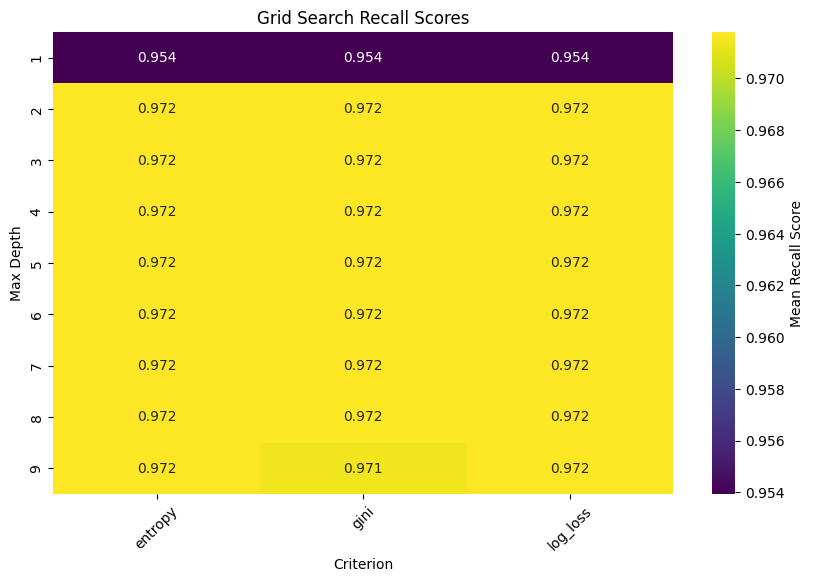

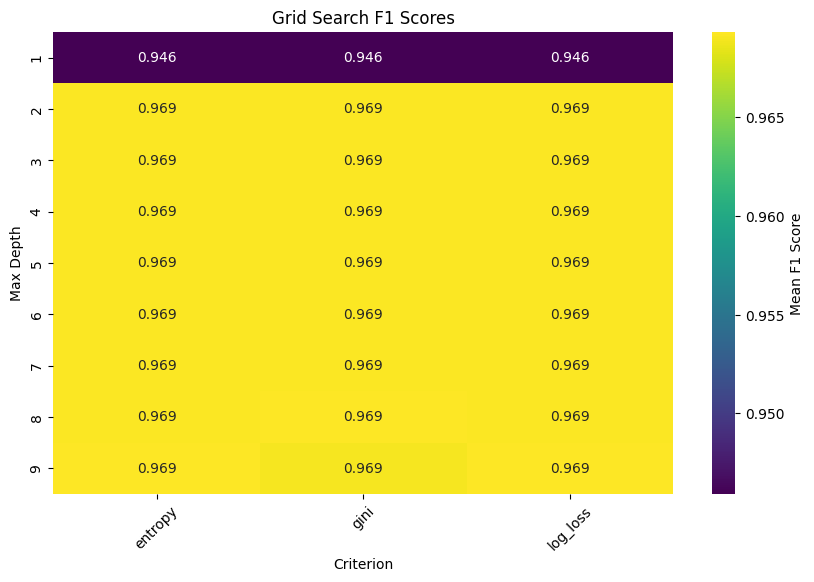

In [48]:
# Cellule de code
from sklearn.model_selection import GridSearchCV
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
param_grid = [
  {'max_depth': range(1, 10),
   'criterion': ["gini", "entropy", "log_loss"]}
]

decision_tree = DecisionTreeClassifier()
#lets set the metrics of the classification report as such:
scoring = {
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

grid_search = GridSearchCV(decision_tree, param_grid, cv=10, scoring=scoring, refit='f1')

grid_search.fit(X_train, y_train)

# Extract the results into a DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Create a pivot table for easier plotting
precision_pivot = results.pivot_table(index="param_max_depth", columns="param_criterion", values="mean_test_precision")
recall_pivot = results.pivot_table(index="param_max_depth", columns="param_criterion", values="mean_test_recall")
f1_pivot = results.pivot_table(index="param_max_depth", columns="param_criterion", values="mean_test_f1")

# Plot the performance of each parameter combination
def plot_heatmap(pivot, metric_name):
    plt.figure(figsize=(10, 6))
    plt.title(f"Grid Search {metric_name.capitalize()} Scores")
    sns.heatmap(pivot, annot=True, fmt=".3f", cmap="viridis", cbar_kws={'label': f'Mean {metric_name.capitalize()} Score'})
    plt.xlabel("Criterion")
    plt.ylabel("Max Depth")
    plt.xticks(rotation=45)
    plt.show()

# Plot heatmaps for each metric
plot_heatmap(precision_pivot, "precision")
plot_heatmap(recall_pivot, "recall")
plot_heatmap(f1_pivot, "f1")



In [44]:
grid_search.best_params_, grid_search.best_score_


print("Meilleur parametre evalue:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Meilleur parametre evalue: {'criterion': 'gini', 'max_depth': 2}
Best cross-validation score: 0.9718
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       1.00      0.67      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.99      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



For this case we had to reduce the fold number, and the range of nearest neighbors, due to long to runtime.Not good for performance.  A high number of cross validiton folds combined with a high range of nearest neighbors returns a high complexity.

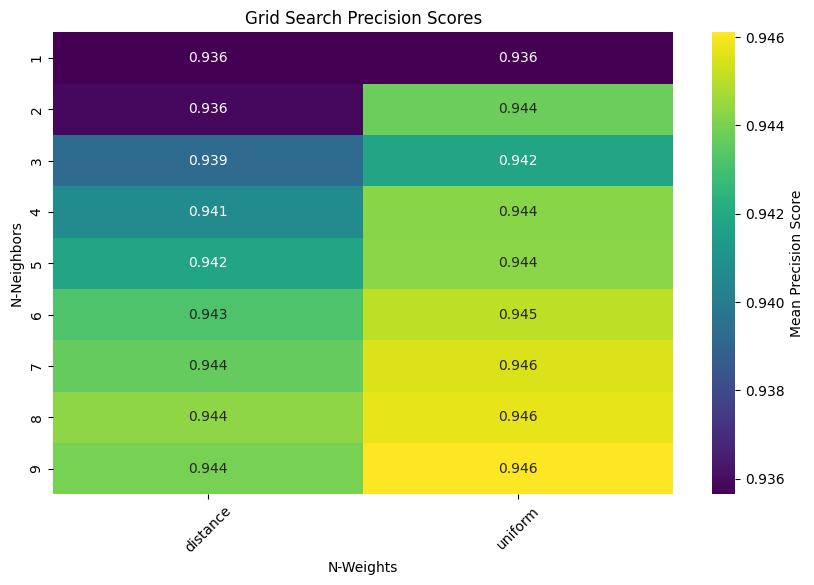

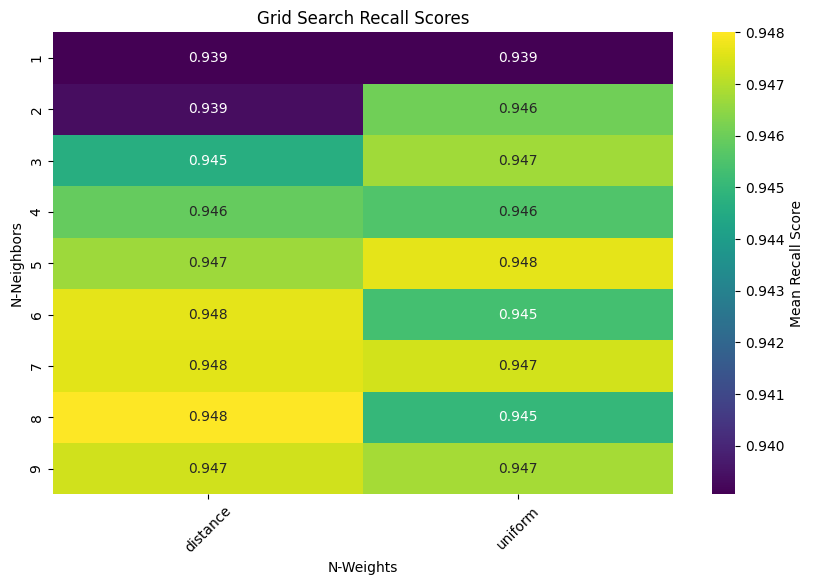

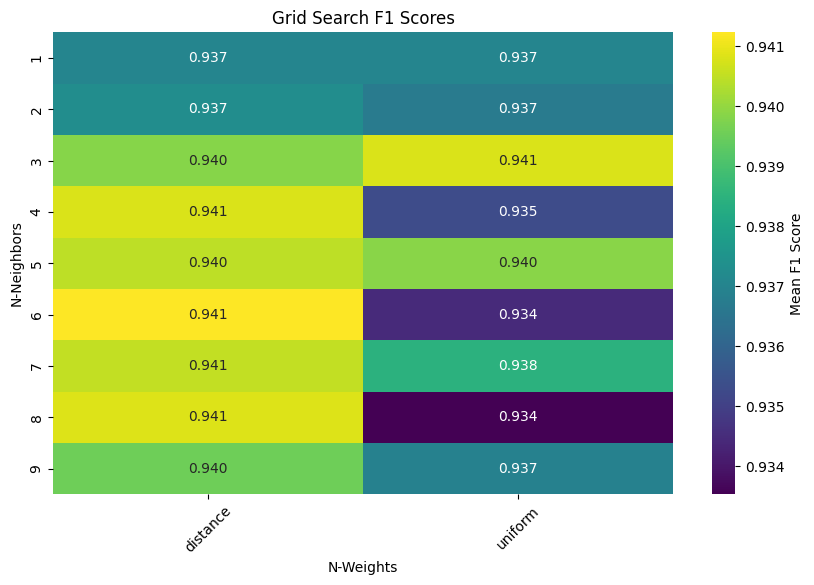

In [50]:
param_grid = [
  {'n_neighbors': range(1, 10),
   'weights': ["uniform", "distance"]}
]

clf = KNeighborsClassifier()

scoring = {
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring=scoring, refit='f1')

grid_search.fit(X_train, y_train)
results = pd.DataFrame(grid_search.cv_results_)

# Create a pivot table to structure the data for the plot

precision_pivot = results.pivot_table(index="param_n_neighbors", columns="param_weights", values="mean_test_precision")
recall_pivot = results.pivot_table(index="param_n_neighbors", columns="param_weights", values="mean_test_recall")
f1_pivot = results.pivot_table(index="param_n_neighbors", columns="param_weights", values="mean_test_f1")

# Plot the performance of each parameter combination using a heatmap
def plot_heatmap(pivot, metric_name):
    plt.figure(figsize=(10, 6))
    plt.title(f"Grid Search {metric_name.capitalize()} Scores")
    sns.heatmap(pivot, annot=True, fmt=".3f", cmap="viridis", cbar_kws={'label': f'Mean {metric_name.capitalize()} Score'})
    plt.xlabel("N-Weights")
    plt.ylabel("N-Neighbors")
    plt.xticks(rotation=45)
    plt.show()

# Plot heatmaps for each metric
plot_heatmap(precision_pivot, "precision")
plot_heatmap(recall_pivot, "recall")
plot_heatmap(f1_pivot, "f1")

In [51]:
grid_search.best_params_, grid_search.best_score_


print("Meilleur parametre evalue:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Meilleur parametre evalue: {'n_neighbors': 6, 'weights': 'distance'}
Best cross-validation score: 0.9412321021760954
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     18292
           1       0.83      0.48      0.61      1708

    accuracy                           0.95     20000
   macro avg       0.89      0.73      0.79     20000
weighted avg       0.94      0.95      0.94     20000



In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2 * 3 * 3 = 18 tests!

param_grid = [
  {'penalty': ["l1", "l2", None],
   'max_iter' : [6000, 7000, 8000], # we had to increase the max_iter because we've reached it and the coefficient did not converger perviously was   'max_iter' : [100, 200, 400, 800, 1600], also tried 'max_iter': [2000, 4000, 6000],
   'tol' : [0.5, 0.2, 0.1]} # Using a larger tol for faster convergence
]
#For large datasets, achieving extremely high precision won't always lead to improvements in models. Plus can cause overhead. a range in the first decimal point can provide an overall better balance betweeen performance and speed

clf = LogisticRegression(solver='saga')
#We noticed there wasnt a difference in metrics when increasing k-fold cross validation, so for better perfomance we set it at 5

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring=scoring, refit='f1')

grid_search.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=LogisticRegression(solver='saga'),
             param_grid=[{'max_iter': [6000, 7000, 8000],
                          'penalty': ['l1', 'l2', None],
                          'tol': [0.5, 0.2, 0.1]}],
             refit='f1',
             scoring={'f1': make_scorer(f1_score, response_method='predict', average=weighted),
                      'precision': make_scorer(precision_score, response_method='predict', average=weighted),
                      'recall': make_scorer(recall_score, response_method='predict', average=weighted)})

Models like linear regression or logistic regression, which have fewer parameters and lower complexity, thus may not require many folds to achieve stable performance metrics. A smaller number of folds is enough for estimating their generalization ability.

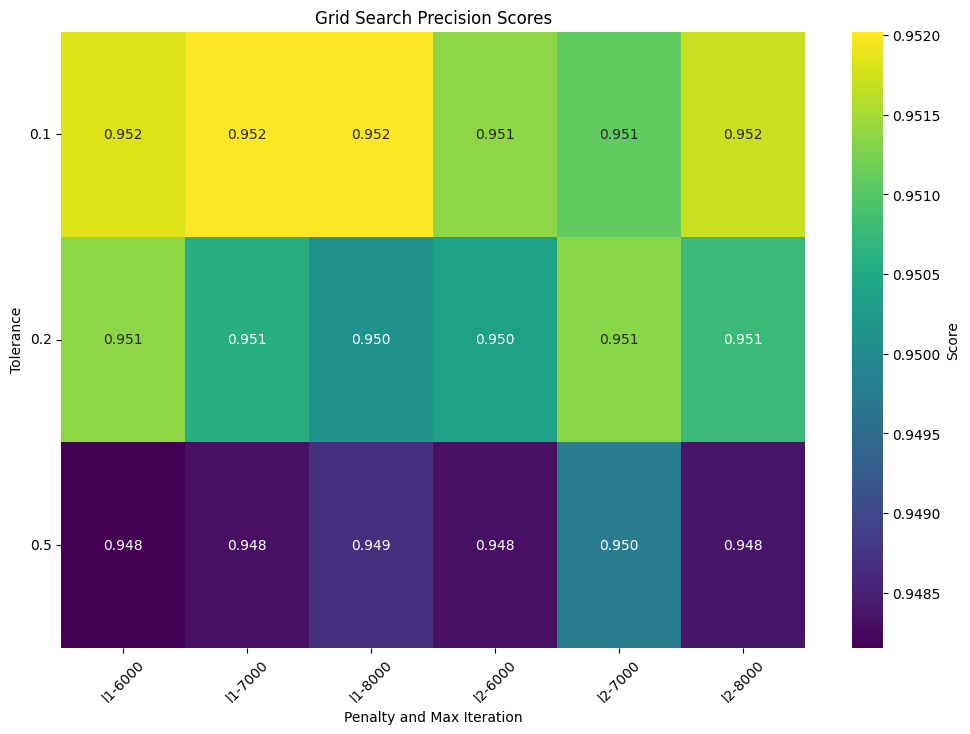

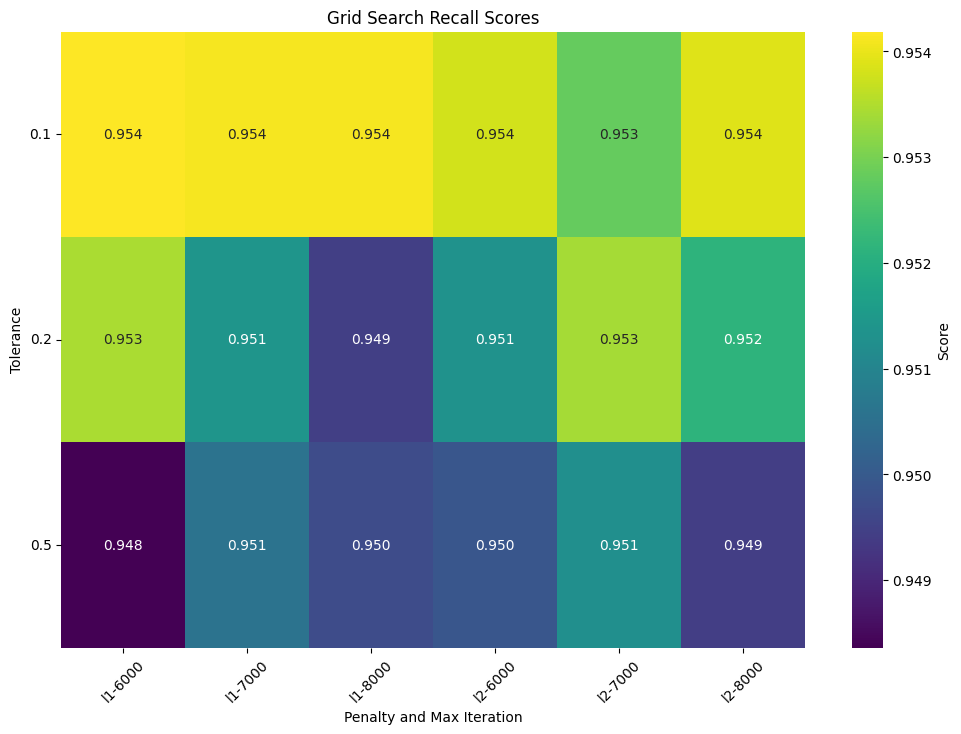

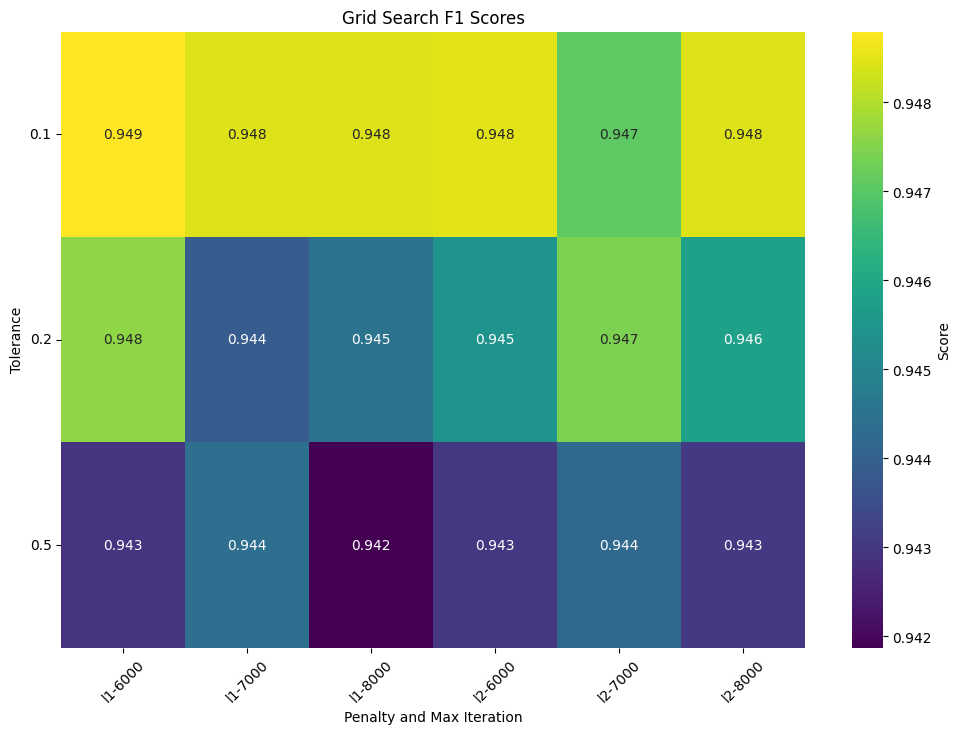

In [58]:
# Extract the results into a DataFrame
scoring = {
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

results = pd.DataFrame(grid_search.cv_results_)



# Create pivot tables for each scoring metric
precision_pivot = results.pivot_table(index='param_tol', columns=['param_penalty', 'param_max_iter'], values='mean_test_precision')
recall_pivot = results.pivot_table(index='param_tol', columns=['param_penalty', 'param_max_iter'], values='mean_test_recall')
f1_pivot = results.pivot_table(index='param_tol', columns=['param_penalty', 'param_max_iter'], values='mean_test_f1')


# Plot the performance of each parameter combination using a heatmap
def plot_heatmap(pivot, title):
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot, annot=True, fmt=".3f", cmap="viridis", cbar_kws={'label': 'Score'})
    plt.title(title)
    plt.xlabel("Penalty and Max Iteration")
    plt.ylabel("Tolerance")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

# Plot heatmaps for each metric
plot_heatmap(precision_pivot, "Grid Search Precision Scores")
plot_heatmap(recall_pivot, "Grid Search Recall Scores")
plot_heatmap(f1_pivot, "Grid Search F1 Scores")


In [56]:
grid_search.best_params_, grid_search.best_score_


print("Meilleur parametre evalue:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Meilleur parametre evalue: {'max_iter': 7000, 'penalty': 'l2', 'tol': 0.1}
Best cross-validation score: 0.9536374999999999
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     18292
           1       0.92      0.45      0.61      1708

    accuracy                           0.95     20000
   macro avg       0.94      0.73      0.79     20000
weighted avg       0.95      0.95      0.94     20000



## Analyse des résultats

10. **Comparaison des modèles** :

    - Comparez les résultats obtenus pour chaque modèle.

    - Discutez des différences observées dans les performances des modèles et fournissez des explications potentielles. Considérez des aspects tels que la complexité des modèles, le déséquilibre des données, le surapprentissage et l'impact du réglage des paramètres sur les résultats globaux.

    - Fournissez des recommandations sur le(s) modèle(s) à choisir pour cette tâche et justifiez vos choix en fonction des résultats de l'analyse.

    - Entraînez le(s) modèle(s) recommandé(s) en utilisant les valeurs optimales des paramètres identifiés lors de l'optimisation des paramètres. Appliquez ensuite le modèle entraîné aux données de test. Documentez vos observations de manière détaillée. Évaluez spécifiquement si les résultats dérivés de la validation croisée sont cohérents avec ceux obtenus sur le jeu de test.

As are heatmaps and cross validation score can clearly show: the best training model for this dataset, would be the decision tree, noted that we use the gini criterion and max_depth of 2. But we if we really compare all metrics of the training model, we can get a better understanting. The model with the highest precision score ( instances that were coorectly predicted as positive) is the decision tree again. This score is important for good predictions. The LogisticRegression model and the decision tree are tied, at the recall score. Meaning that the models correctly predicted a positive patient, that was indeed diabetic. This shows that these models are very accurate at identifying all positive instances. AS for the f1_score offers a look at a balance between both precion and recall, ranges between 0 to 1. Again the decision tree clearly wins it 

Meilleur parametre evalue: {'criterion': 'gini', 'max_depth': 2}
Best cross-validation score: 0.9718
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       1.00      0.67      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.99      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000

Meilleur parametre evalue: {'n_neighbors': 6, 'weights': 'distance'}
Best cross-validation score: 0.9412321021760954
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     18292
           1       0.83      0.48      0.61      1708

    accuracy                           0.95     20000
   macro avg       0.89      0.73      0.79     20000
weighted avg       0.94      0.95      0.94     20000


Meilleur parametre evalue: {'max_iter': 7000, 'penalty': 'l2', 'tol': 0.1}
Best cross-validation score: 0.9536374999999999
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     18292
           1       0.92      0.45      0.61      1708

    accuracy                           0.95     20000
   macro avg       0.94      0.73      0.79     20000
weighted avg       0.95      0.95      0.94     20000

In the decision tree we can see that the more the depth increase the lesser the significancy this is a good example of increasing depth can lead to overfitting . The precision score will decrease, no matter the criterion, we have and overall similarity between all off them, but a depth of 1 has the lowest score (underfitting). Same goes for the recall score.




As for the k-neighbors model, we spoke about the choice of k affecting the model's complexity. A small k can lead to overfitting (the model is too sensitive to noise), while a large k can smooth out the decision boundary and possibly lead to underfitting.
Keping a uniform distance between each node to qualify it as neighbor, seems like the best approach to get a good precision score, with k=7, we have the highest precision score for this model at 9.46. Given the distance parameter, with an overall better recall score, sitting at 6 neighbors through max 10, on the other hand the uniform parameter still shows a great performance in recall, considering 5 neighbors. We'll use the f1_score as our last judge.The f1 score indicates in our model the overall better balance between the two scores. THus when selecting the distance parameter for more than 4 neighbors,  the uniform parameters gives an as good performance with just 3 neighbors, hence better for performance. (less neighbors needed). 


Lastly the Logistic Regression model, has an overall good precision score with an l1, as long as the tolerance is set at decimal point. Same for the recall score. Easiest decision of parameters. Since this a linear model, hence a linear relationship between features and outcomes, it is very effective with linearly separable data. The L1 penalty actually encourages which may help reducing the effect of coefficients closest to zero, thus gain help in avoiding overfitting by eliminating less important features.

In conclusion, tuning parameters like depth and minimum samples per leaf, in decisiotn trees for example, can help control overfitting and improve generalization.
For KNN, selecting the optimal k and the right distance metric can affect neighbor selection, which is crucial in achieving high precision and recall.
Logistic regression benefits from tuning as well and choosing the appropriate penalty type (L1 or L2), can directly highlight model's important features and complexity.

In [ ]:
# Cellule de code

# 2. Documentation de l'analyse exploratoire

Le rapport doit documenter de manière complète le processus suivi pendant ce devoir. Le notebook Jupyter doit inclure les éléments suivants :

- Votre nom(s), numéro(s) d'étudiant.e.s et un titre de rapport.
- Expliquez comment les tâches ont été réparties entre les membres. Comment avez-vous fait en sorte que les deux personnes atteignent les objectifs d'apprentissage ?
- Une section pour chaque étape de l'analyse exploratoire, contenant le code Python pertinent et les explications ou résultats.
  - Pour les sections nécessitant du code Python, incluez le code dans une cellule.
  - Pour les sections nécessitant des explications ou des résultats, incluez-les dans une cellule distincte ou en combinaison avec les cellules de code.
- Assurez une séparation logique du code dans différentes cellules. Par exemple, la définition d'une fonction doit se trouver dans une cellule et son exécution dans une autre. Évitez de placer trop de code dans une seule cellule pour maintenir la clarté et la lisibilité.
- Le notebook que vous soumettez doit inclure les résultats de l'exécution, y compris les graphiques, en veillant à ce que l'assistant d'enseignement puisse évaluer le notebook sans avoir à exécuter le code.

# Ressources